In [1]:
# Imports
import numpy as np
import pandas as pd
import xarray as xr
import hexMinisom
# from minisom import MiniSom as MS
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import colormaps
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cf
from itertools import product
# from sammon import sammon
import colorsys
import random
import pickle

In [2]:
dataset = xr.open_dataarray('/glade/derecho/scratch/jhayron/Data4WRsClimateChange/ProcessedDataReanalyses/Z500Anoms_ERA5.nc')

latSlice = slice(20, 80) #20N, 80N
lonSlice = slice(180, 330) #180W, 30W
dataarray = dataset.sel(lat=latSlice, lon=lonSlice)
dataarray = dataarray.stack(latlon=['lat', 'lon']).values

print(dataarray.shape)

(30660, 9211)


### Pacific Trough Diversity

In [3]:
# Import the regime labels
WR_labels_df = pd.read_csv('/glade/u/home/jhayron/WR_Trends/ProcessZ500/labels/df_labels_nocorrfilt_ERA5.csv')
WR_labels_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
WR_labels_df['date'] = pd.to_datetime(WR_labels_df['date'], format='%Y-%m-%d')
WR_labels_dict = {0: 'Polar High', 1: 'Pacific Trough', 2: 'Pacific Ridge', 3: 'Alaskan Ridge', 4: 'Atlantic Ridge', 5: 'No WR'}
WR_labels = np.array(WR_labels_df['WR'])

# Set up our lats and lons
lats = dataset.sel(lat=latSlice, lon=lonSlice).lat
lons = dataset.sel(lat=latSlice, lon=lonSlice).lon - 360
lons, lats = np.meshgrid(lons, lats)

# get the closest and furthest distance days
wr = 1
closest = min(WR_labels_df[WR_labels_df['WR'] == wr]['distances'])
furthest = max(WR_labels_df[WR_labels_df['WR'] == wr]['distances'])
cidx = WR_labels_df[WR_labels_df['distances'] == closest].index[0]
fidx = WR_labels_df[WR_labels_df['distances'] == furthest].index[0]
cdata = dataarray[cidx].reshape((lons.shape[0], lats.shape[1]))
fdata = dataarray[fidx].reshape((lons.shape[0], lats.shape[1]))

# get the regime mean
wr_idxs = np.array(WR_labels == wr).nonzero()[0]
regime_mean = np.mean(dataarray[wr_idxs], axis=0).reshape((lons.shape[0], lats.shape[1]))


In [4]:
import string
abcd = list(string.ascii_lowercase)

import matplotlib.path as mpath

/glade/derecho/scratch/jhayron/tmp/ipykernel_25805/3304923376.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 3, 1, projection=ccrs.AlbersEqualArea(
/glade/derecho/scratch/jhayron/tmp/ipykernel_25805/3304923376.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 3, 2, projection=ccrs.AlbersEqualArea(
/glade/derecho/scratch/jhayron/tmp/ipykernel_25805/3304923376.py:72: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 3, 3, projection=ccrs.AlbersEqualArea(
/glade/derecho/scratch/jhayron/tmp/ipykernel_25805/3304923376.py:102: UserWarning: This figure

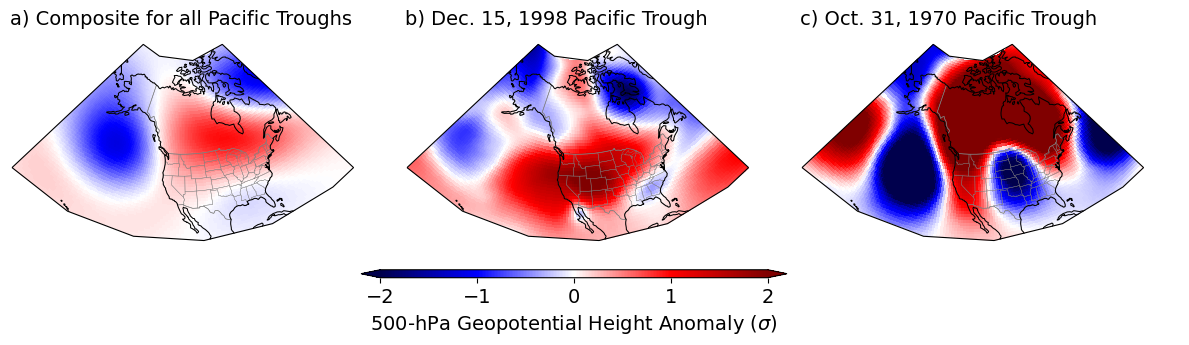

In [23]:
fontsize_most_things = 14
mini=-2
maxi=2
intervals = 41
bounds=np.linspace(mini,maxi,intervals)

fig, axs = plt.subplots(
        1, 3,
        figsize=(12, 4))

axs_list = axs.flatten().tolist()
extent = [-180, -50, 20, 80]
# Create a rectangular boundary matching the extent
verts = [
    (extent[0], extent[2]),  # Bottom-left corner
    (extent[1], extent[2]),  # Bottom-right corner
    (extent[1], extent[3]),  # Top-right corner
    (extent[0], extent[3]),  # Top-left corner
    (extent[0], extent[2])   # Closing the rectangle
]
# ################# PLOT Mean ######################

ax = plt.subplot(1, 3, 1, projection=ccrs.AlbersEqualArea(
            central_longitude=-115,
            central_latitude=50,
            standard_parallels=(30, 70)
        ))
pm = ax.pcolormesh(lons, lats, regime_mean,
        transform=ccrs.PlateCarree(),
        vmin=mini, vmax=maxi, cmap='seismic')

ax.set_title(
    f'{abcd[0]}) Composite for all Pacific Troughs', 
    fontsize=fontsize_most_things,loc='left')

ax.coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
ax.margins(x=0, y=0)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=0.5, zorder=5)  # Add country borders
ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.25, zorder=5)  # Add state/province borders

rect = mpath.Path(verts)
# Set the boundary of the plot
ax.set_boundary(rect, transform=ccrs.PlateCarree())

# ################# PLOT Ex. 1 ######################

ax = plt.subplot(1, 3, 2, projection=ccrs.AlbersEqualArea(
            central_longitude=-115,
            central_latitude=50,
            standard_parallels=(30, 70)
        ))

pm = ax.pcolormesh(lons, lats, cdata,
        transform=ccrs.PlateCarree(),
        vmin=mini, vmax=maxi, cmap='seismic')

ax.set_title(
    f'{abcd[1]}) Dec. 15, 1998 Pacific Trough', 
    fontsize=fontsize_most_things,loc='left')

ax.coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
ax.margins(x=0, y=0)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=0.5, zorder=5)  # Add country borders
ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.25, zorder=5)  # Add state/province borders

rect = mpath.Path(verts)
# Set the boundary of the plot
ax.set_boundary(rect, transform=ccrs.PlateCarree())

# ################# PLOT Ex. 2 ######################

ax = plt.subplot(1, 3, 3, projection=ccrs.AlbersEqualArea(
            central_longitude=-115,
            central_latitude=50,
            standard_parallels=(30, 70)
        ))

pm = ax.pcolormesh(lons, lats, fdata,
        transform=ccrs.PlateCarree(),
        vmin=mini, vmax=maxi, cmap='seismic')

ax.set_title(
    f'{abcd[2]}) Oct. 31, 1970 Pacific Trough', 
    fontsize=fontsize_most_things,loc='left')

ax.coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
ax.margins(x=0, y=0)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=0.5, zorder=5)  # Add country borders
ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.25, zorder=5)  # Add state/province borders

rect = mpath.Path(verts)
# Set the boundary of the plot
ax.set_boundary(rect, transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.305, 0.15, 0.355, 0.02])
ticks_1 = [-2, -1, 0, 1, 2]
cbar = fig.colorbar(pm, cax=cbar_ax, ticks=ticks_1[:],
                orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=fontsize_most_things)
cbar.set_label('500-hPa Geopotential Height Anomaly ($\sigma$)', fontsize=fontsize_most_things)

plt.tight_layout()
plt.savefig('Figures/PT_Diversity_v20250315.pdf',bbox_inches='tight')